# **CREDIT CARD FRAUD ANALYSYS**

datasets :- [fraudTest.csv](https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTest.csv),
[fraudTrain.csv](https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv)

In [42]:
#import require libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, rand_score, confusion_matrix, classification_report,roc_curve
sns.set_theme(color_codes=True)

In [5]:
dataframe = pd.read_csv('/content/fraudTest.csv')

In [6]:
dataframe.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
def segment_by_amount(row):
    if row['amt'] > 100:
        return 'High'
    elif row['amt'] > 50:
        return 'Medium'
    else:
        return 'Low'
dataframe['amount_segment'] = dataframe.apply(segment_by_amount, axis=1)
print(dataframe.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      long city_pop  \
0   Elliott      M            351 Darlene Green  ...  -80.9355   333497   
1  Williams      F             3638 Marsh Union  ... -110.4360

<ipython-input-8-da4be707a1ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='amount_segment', data=dataframe, palette='viridis')


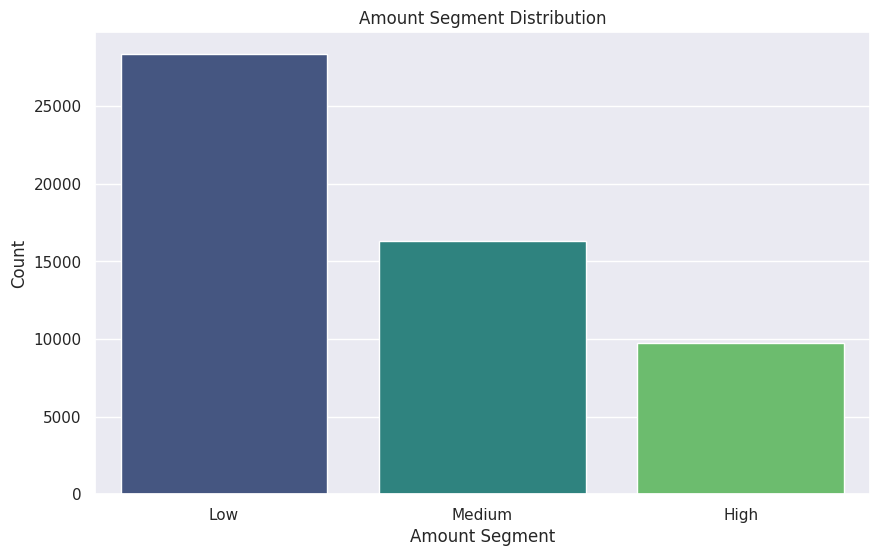

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='amount_segment', data=dataframe, palette='viridis')
plt.title('Amount Segment Distribution')
plt.xlabel('Amount Segment')
plt.ylabel('Count')
plt.show()

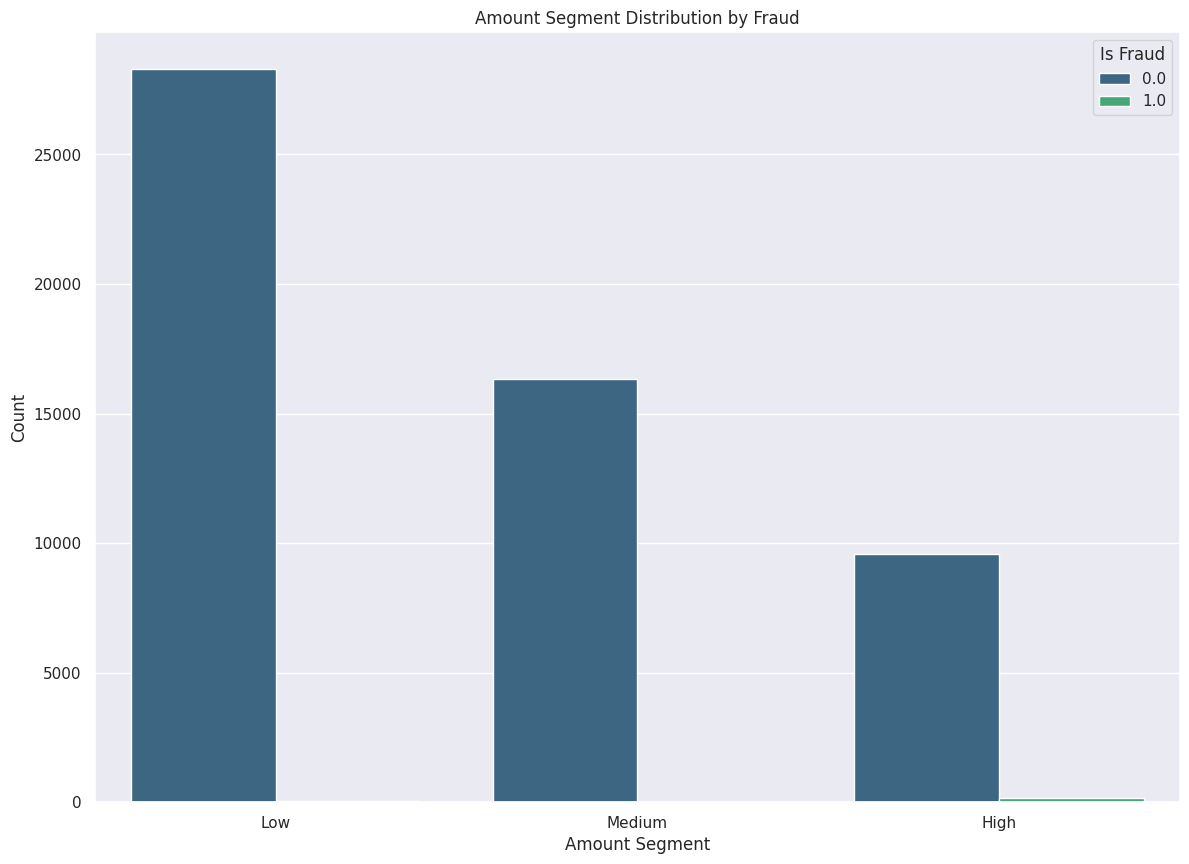

In [9]:
plt.figure(figsize=(14, 10))
sns.countplot(x='amount_segment', hue='is_fraud', data=dataframe, palette='viridis')
plt.title('Amount Segment Distribution by Fraud')
plt.xlabel('Amount Segment')
plt.ylabel('Count')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()

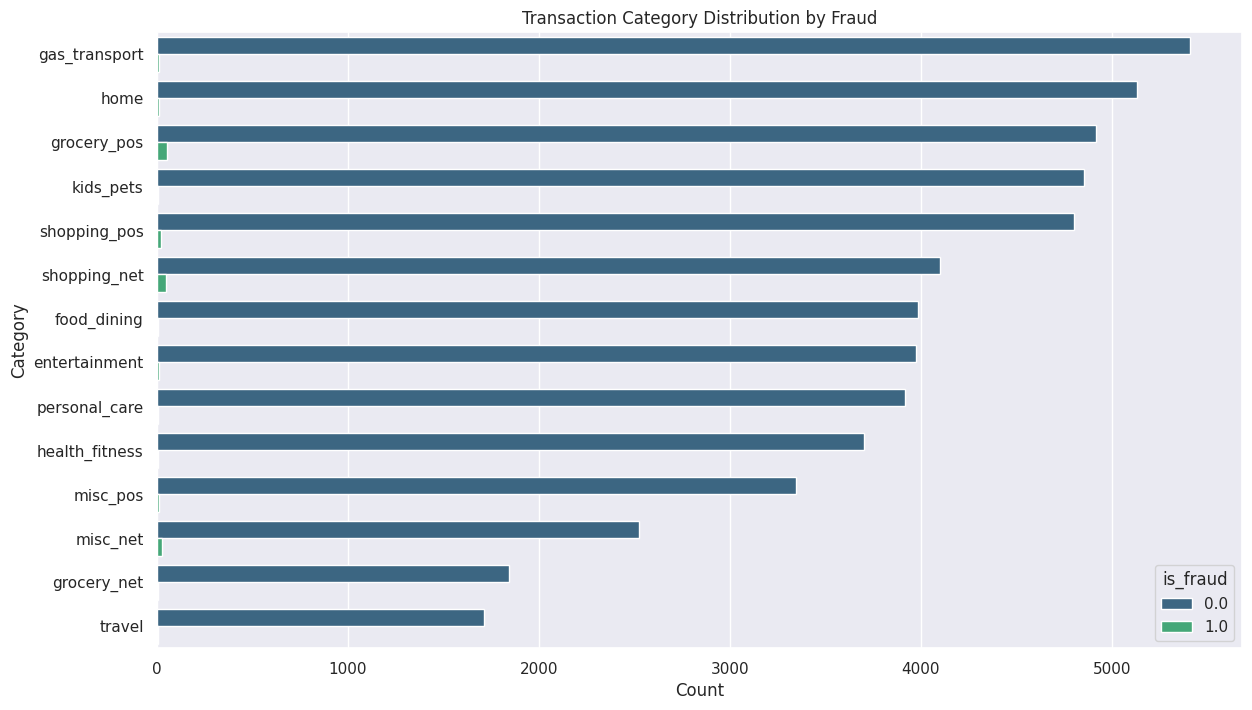

In [10]:
plt.figure(figsize=(14, 8))
sns.countplot(y='category', hue='is_fraud', data=dataframe, palette='viridis', order=dataframe['category'].value_counts().index)
plt.title('Transaction Category Distribution by Fraud')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [11]:
print(dataframe.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      long city_pop  \
0   Elliott      M            351 Darlene Green  ...  -80.9355   333497   
1  Williams      F             3638 Marsh Union  ... -110.4360

In [12]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54449 entries, 0 to 54448
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             54449 non-null  int64  
 1   trans_date_trans_time  54449 non-null  object 
 2   cc_num                 54449 non-null  int64  
 3   merchant               54449 non-null  object 
 4   category               54449 non-null  object 
 5   amt                    54449 non-null  float64
 6   first                  54449 non-null  object 
 7   last                   54449 non-null  object 
 8   gender                 54449 non-null  object 
 9   street                 54449 non-null  object 
 10  city                   54449 non-null  object 
 11  state                  54449 non-null  object 
 12  zip                    54449 non-null  int64  
 13  lat                    54449 non-null  float64
 14  long                   54449 non-null  float64
 15  ci

In [13]:
print(dataframe.describe())

        Unnamed: 0        cc_num           amt           zip           lat  \
count  54449.00000  5.444900e+04  54449.000000  54449.000000  54449.000000   
mean   27224.00000  4.147793e+17     69.464746  48705.785285     38.533213   
std    15718.21674  1.305165e+18    148.746118  26789.779602      5.078851   
min        0.00000  6.041621e+10      1.000000   1257.000000     20.027100   
25%    13612.00000  1.800365e+14      9.730000  26237.000000     34.620500   
50%    27224.00000  3.518669e+15     47.170000  48154.000000     39.371600   
75%    40836.00000  4.634956e+15     82.860000  72011.000000     42.014400   
max    54448.00000  4.992346e+18  13149.150000  99783.000000     65.689900   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  54449.000000  5.444900e+04  5.444800e+04  54448.000000  54448.000000   
mean     -90.136110  9.067881e+04  1.372603e+09     38.531112    -90.133698   
std       13.635477  3.053142e+05  4.726816e+05      5.11343

In [14]:
for column in dataframe.columns:
    if dataframe[column].dtype in ['int64', 'float64']:
        dataframe[column].fillna(dataframe[column].mean(), inplace=True)
    else:
        dataframe[column].fillna(dataframe[column].mode()[0], inplace=True)

label_encoder = {}
for column in dataframe.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataframe[column] = le.fit_transform(dataframe[column])
    label_encoder[column] = le

dataframe = dataframe.drop(columns=['Unnamed: 0', 'trans_date_trans_time','first', 'last', 'street', 'city', 'state'])


In [15]:

x = dataframe.drop(columns=['is_fraud'])
y = dataframe['is_fraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [16]:
logistic_regression = LogisticRegression(class_weight = 'balanced')
random_forest = RandomForestClassifier(class_weight='balanced')
gradient_boosting = GradientBoostingClassifier()

if y_train.dtype in ['int64', 'float64']:
    threshold = 0.5
    y_train = (y_train > threshold).astype(int)


logistic_regression.fit(x_train_scaled, y_train)
random_forest.fit(x_train_scaled, y_train)
gradient_boosting.fit(x_train_scaled, y_train)

models = [logistic_regression, random_forest, gradient_boosting]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    score = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='roc_auc')
    print(f'{name} ROC_AUC Score: {score.mean():.2f} +-{score.std():.2f}')


Logistic Regression ROC_AUC Score: 0.90 +-0.04
Random Forest ROC_AUC Score: 0.97 +-0.02
Gradient Boosting ROC_AUC Score: 0.77 +-0.18


In [17]:
def evaluate_model(model, x_test, y_test):
    y_prob = model.predict_proba(x_test)[:, 1]

    optimal_threshold = 0.5
    y_pred = (y_prob > optimal_threshold).astype(int)

    print("Data type of y_test:", y_test.dtype)
    print("Data type of y_pred:", y_pred.dtype)

    if y_test.dtype != 'int':
        y_test = y_test.astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return accuracy, precision, recall, f1, roc_auc

# Model evaluation loop
for model, name in zip(models, model_names):
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, x_test_scaled, y_test)
    print(f'{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, ROC AUC: {roc_auc:.2f}')

Data type of y_test: float64
Data type of y_pred: int64
Confusion Matrix:
[[9495 1335]
 [  15   45]]
Logistic Regression - Accuracy: 0.88, Precision: 0.03, Recall: 0.75, F1 Score: 0.06, ROC AUC: 0.84
Data type of y_test: float64
Data type of y_pred: int64
Confusion Matrix:
[[10830     0]
 [   31    29]]
Random Forest - Accuracy: 1.00, Precision: 1.00, Recall: 0.48, F1 Score: 0.65, ROC AUC: 0.98
Data type of y_test: float64
Data type of y_pred: int64
Confusion Matrix:
[[10824     6]
 [   33    27]]
Gradient Boosting - Accuracy: 1.00, Precision: 0.82, Recall: 0.45, F1 Score: 0.58, ROC AUC: 0.89


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(random_forest, param_grid_rf , cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(x_train_scaled, y_train)
print(f'Best Parameters for Random Forest: {grid_rf.best_params_}')


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [19]:

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.02],
    'max_depth': [3, 5, 7]
}

grid_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=5, scoring='roc_auc')
grid_gb.fit(x_train_scaled, y_train)
print(f'Best Parameters for Gradient Boosting: {grid_gb.best_params_}')

Best Parameters for Gradient Boosting: {'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 200}


In [20]:
best_rf = grid_rf.best_estimator_
best_gb = grid_gb.best_estimator_

for model, name in zip([logistic_regression, best_rf, best_gb], ['Logistic Regression', 'Tuned Random Forest', 'Tuned Gradient Boosting']):
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, x_test_scaled, y_test)
    print(f'{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, ROC AUC: {roc_auc:.2f}')

Data type of y_test: float64
Data type of y_pred: int64
Confusion Matrix:
[[9495 1335]
 [  15   45]]
Logistic Regression - Accuracy: 0.88, Precision: 0.03, Recall: 0.75, F1 Score: 0.06, ROC AUC: 0.84
Data type of y_test: float64
Data type of y_pred: int64
Confusion Matrix:
[[10830     0]
 [   30    30]]
Tuned Random Forest - Accuracy: 1.00, Precision: 1.00, Recall: 0.50, F1 Score: 0.67, ROC AUC: 0.99
Data type of y_test: float64
Data type of y_pred: int64
Confusion Matrix:
[[10824     6]
 [   29    31]]
Tuned Gradient Boosting - Accuracy: 1.00, Precision: 0.84, Recall: 0.52, F1 Score: 0.64, ROC AUC: 0.95


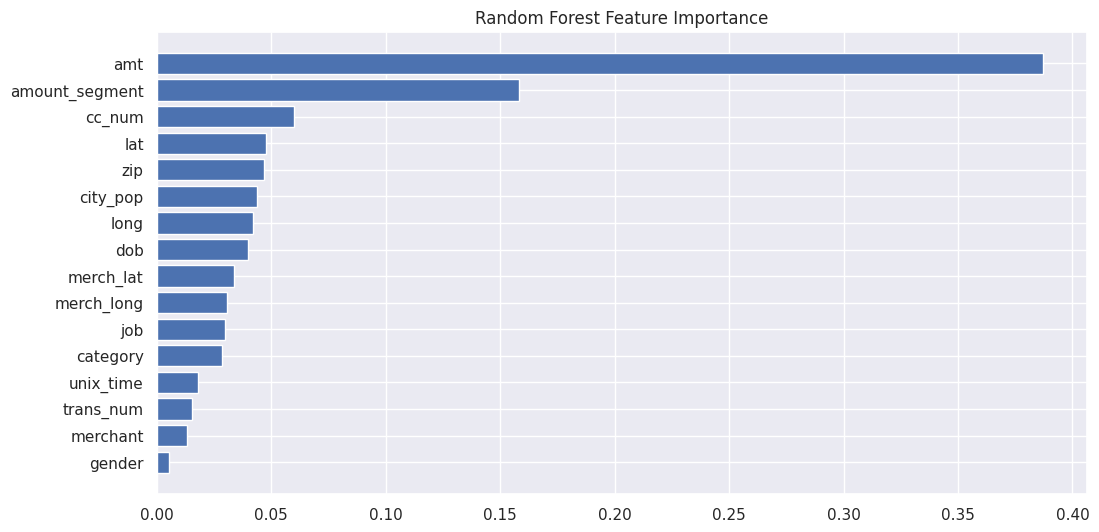

In [35]:
feature_importance_rf = best_rf.feature_importances_
sorted_idx_rf = np.argsort(feature_importance_rf)
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx_rf)), feature_importance_rf[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), x.columns[sorted_idx_rf])
plt.title('Random Forest Feature Importance')
plt.show()

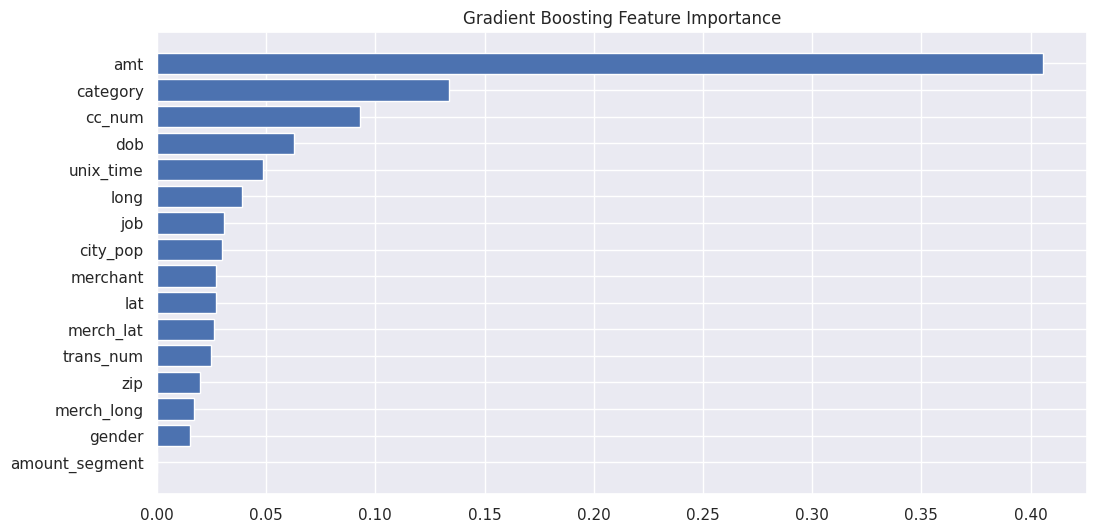

In [36]:
feature_importance_gb = best_gb.feature_importances_
sorted_idx_gb = np.argsort(feature_importance_gb)
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center')
plt.yticks(range(len(sorted_idx_gb)), x.columns[sorted_idx_gb])
plt.title('Gradient Boosting Feature Importance')
plt.show()

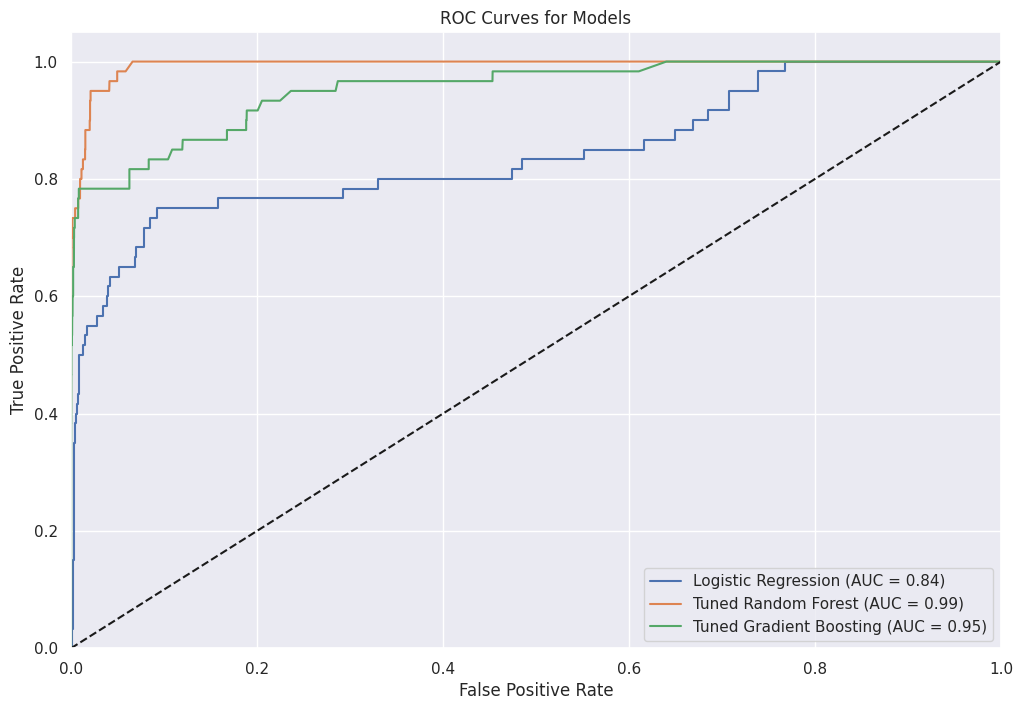

In [43]:
plt.figure(figsize=(12, 8))
for model, name in zip([logistic_regression, best_rf, best_gb], ['Logistic Regression', 'Tuned Random Forest', 'Tuned Gradient Boosting']):
    y_prob = model.predict_proba(x_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Models')
plt.legend(loc='lower right')
plt.show()
